# Analysis of Remarks made by DoD on Films to find 

Using [Spacy NER](https://spacy.io/api/entityrecognizer).

To look at the various types of support provided by the DoD, we use the Named Entity Recognition (NER) on the remarks made by DoD while deciding on assistance to the films. We shall use a pre-trained NER model available on spaCy/NLTK to identify the entities relating to
- EVENT,
- GPE (Countries, cities, states)
- FAC (buildings, airports, highways, bridges, etc.),
- LOC (mountain ranges, bodies of water),
- ORG (companies, agencies, institutions), and 
- PRODUCT (objects, vehicles, food, etc.) tags. 

These tags will help us to annotate the text with its properties and as the DoD could provide support in terms of personnel, equipment, and locations these tags will identify such entries from the text.

In [23]:
# import libraries
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

Read the final aggregated movie data with additional information, we will only use the columns of Title, status, Media Type, Remarks and plot.

In [2]:
col_list = ['Title', 'Status', 'Media Type', 'Remarks', 'plot']
movie_data = pd.read_csv("../data/with_additional_data/military_hollywood_with_additional_data.csv", usecols = col_list)
movie_data.head()

,Title,Status,Media Type,Remarks,plot
0,"""1968""",OTH,FILM,THE FILM STARTED OUT VERY NEGATIVE FOR THE ARM...,NaN
1,"1,000 MEN AND A BABY",APP,TV,VERY POSITIVE DEPICTION OF NAVY IN THIS KOREAN...,A baby in a foreign land is adopted by the men...
2,1ST FORCE,OTH,FILM,INITIALLY DOD AND USMC WERE INCLINED TO SUPPOR...,NaN
3,24,APP,TV,APPROVED FILMING FOR ONE DAY WITH TWO MARINE C...,Jack and Tony clash as they wait for the time ...
4,3RD DEGREE,APP,TV,PERSONNEL APPEARED ON THIS GAME SHOW AT THE EX...,Scott Weston is a private investigator who is ...


Creating the Spacy Pipeline

In [3]:
nlp = spacy.load('en_core_web_trf')

## Analysis of entities in the remarks of movies that have received support from the Department of Defense

Select the movies and films that have been approved.

In [4]:
# Take a subset of approved and denied movies
array = ['APP']
dod_subset = movie_data.loc[movie_data['Status'].isin(array)]
# lower casing the textual fields
dod_subset["Remarks"] = dod_subset["Remarks"].astype(str).apply(lambda x: x.lower())
dod_subset

<ipython-input-4-047811e2ab78>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dod_subset["Remarks"] = dod_subset["Remarks"].astype(str).apply(lambda x: x.lower())


,Title,Status,Media Type,Remarks,plot
1,"1,000 MEN AND A BABY",APP,TV,very positive depiction of navy in this korean...,A baby in a foreign land is adopted by the men...
3,24,APP,TV,approved filming for one day with two marine c...,Jack and Tony clash as they wait for the time ...
4,3RD DEGREE,APP,TV,personnel appeared on this game show at the ex...,Scott Weston is a private investigator who is ...
11,ABOVE AND BEYOND,APP,FILM,story of paul tibbetts and the atomic bomb mis...,"The story of Colonel Paul Tibbets, the pilot o..."
12,ABOVE THE CLOUDS,APP,FILM,"navy provided use of battleships, submarines, ...",Another story of the newsreel cameramen and th...
...,...,...,...,...,...
849,WINGS OF EAGLES,APP,FILM,"story of early navy aviator, spig wead. after ...",U.S. Navy pilot Frank 'Spig' Wead is a fun-lov...
850,WITHOUT GLORY,APP,FILM,approved by the department since it was based ...,NaN
853,X-15,APP,FILM,airforce and nasa provided full cooperation on...,At the height of the Cold War during the 1960s...
855,"YOUNG LIONS, THE",APP,FILM,pentagon and state department went through lon...,The destiny of three soldiers during World War...


Join all the remarks into a single string to make it into a document on which entity counting takes place.

In [5]:
app_remarks = nlp(''.join(str(dod_subset.Remarks.tolist())))

_app_remarks_ contains the tokens of various pipelines applied through nlp. We shall take the recognized entities using `ent` attribute. Then we create a dictionary with key as the entity label and value as a list of the text itself.

In [11]:
dod_remark_entities = {}

for token in app_remarks.ents:
    if token.label_ not in dod_remark_entities:
        dod_remark_entities[token.label_] = []
    dod_remark_entities[token.label_].append(token.text)

In [46]:
def plot_entity_count(entity_dict, entity_label, minimum_count=1):
    label_counter = Counter(entity_dict[entity_label])
    label_counts = [(k,c) for k, c in label_counter.items() if c >= minimum_count]
    df_label = pd.DataFrame(label_counts, columns=['text', 'count'])
    df_label.sort_values(by='count').plot.barh(x='text', y='count', title=entity_label, figsize=(10,10))
    plt.show()

In [51]:
def plot_entity_cloud(entity_dict, entity_label, minimum_count=1):
    
    # Join the entities together.
    long_string = ','.join(entity_dict[entity_label])
    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
    # Generate a word cloud
    wordcloud.generate(long_string)
    # Visualize the word cloud
    wordcloud.to_image()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Wordcloud of Label "{}"'.format(entity_label))
    plt.show()

### Analysis of EVENT entities

EVENT represents the Named hurricanes, battles, wars, sports events etc.

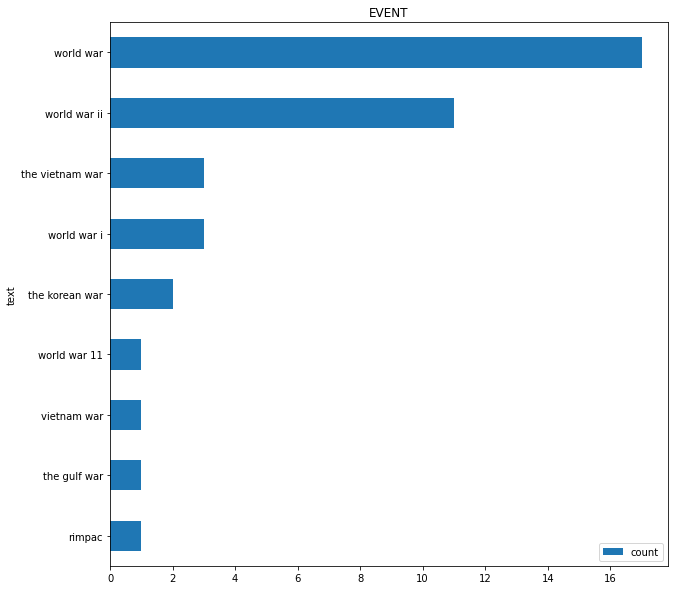

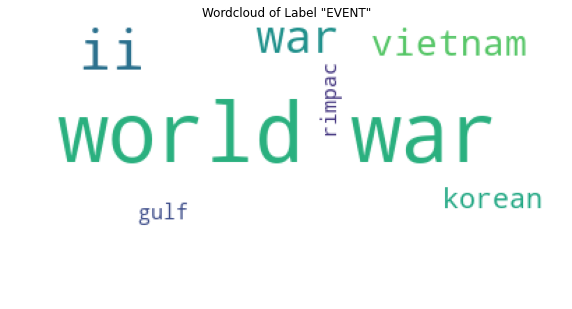

In [56]:
plot_entity_count(dod_remark_entities, "EVENT", minimum_count=1)
plot_entity_cloud(dod_remark_entities, "EVENT", minimum_count=1)

#### Interpretation of the analysis of EVENT entities

TBD

### Analysis of GPE entities

GPE represents Countries, cities, states

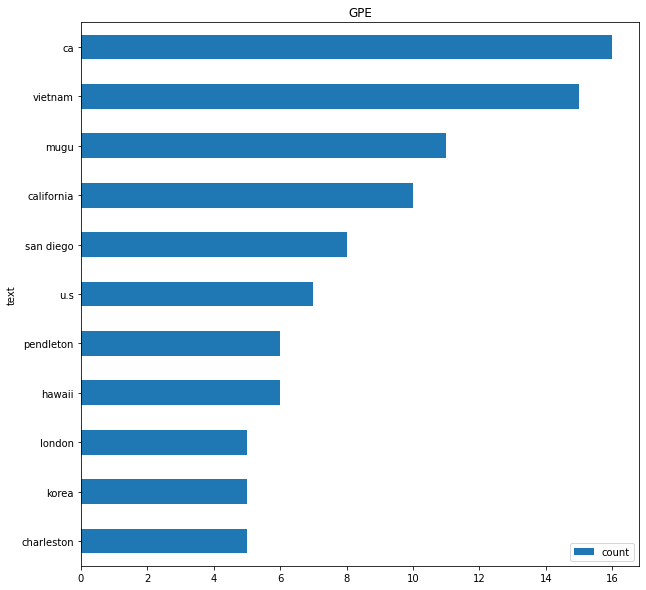

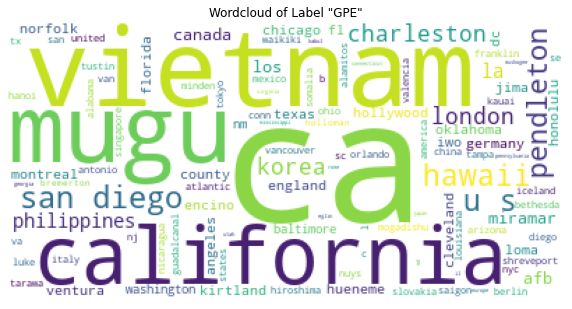

In [52]:
plot_entity_count(dod_remark_entities, "GPE", minimum_count=5)
plot_entity_cloud(dod_remark_entities, "GPE", minimum_count=1)

#### Interpretation of the analysis of GPE entities

TBD

### Analysis of FAC entities

FAC represents the buildings, airports, highways, bridges etc.

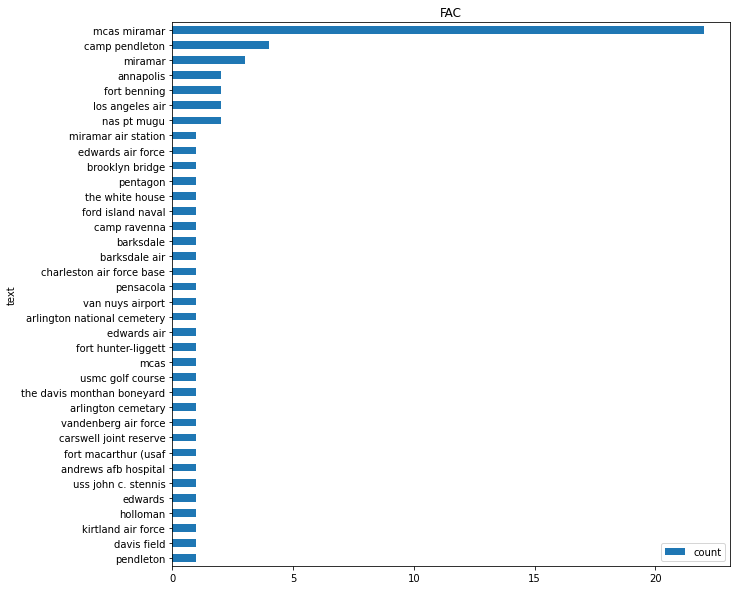

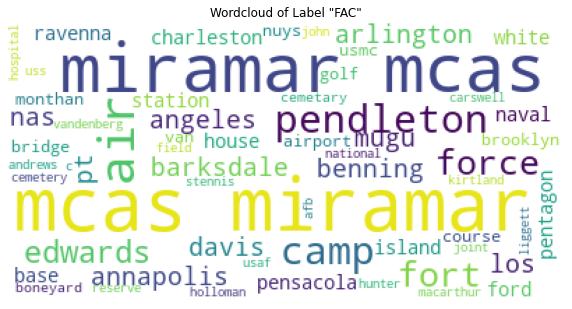

In [60]:
plot_entity_count(dod_remark_entities, "FAC", minimum_count=1)
plot_entity_cloud(dod_remark_entities, "FAC", minimum_count=1)

#### Interpretation of the analysis of FAC entities

TBD

### Analysis of LOC entities

LOC represents the Non-GPE locations, mountain ranges, bodies of water.

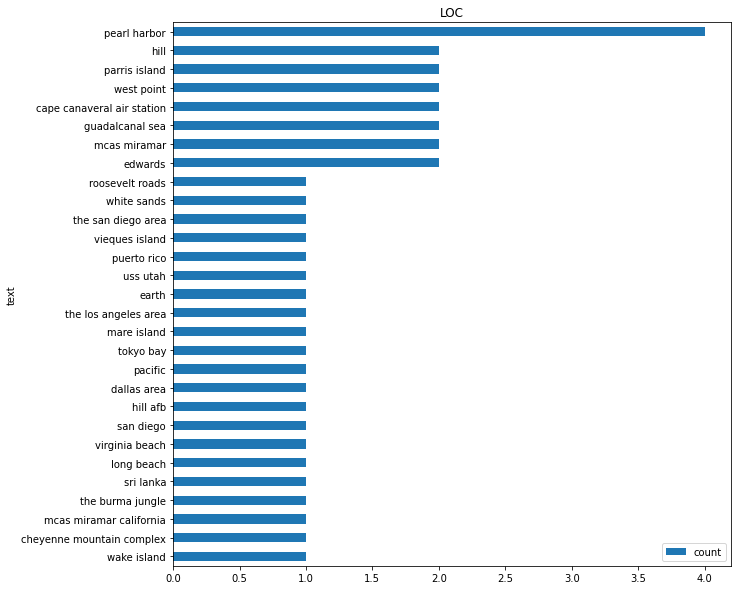

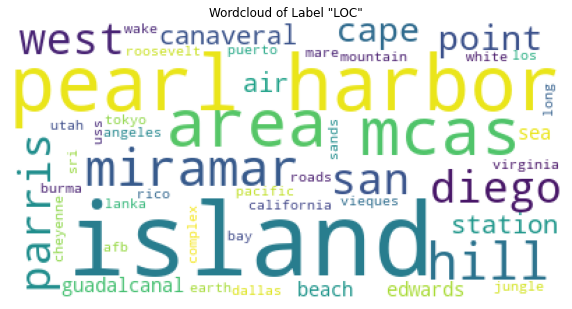

In [59]:
plot_entity_count(dod_remark_entities, "LOC", minimum_count=1)
plot_entity_cloud(dod_remark_entities, "LOC", minimum_count=1)

#### Interpretation of the analysis of LOC entities

TBD

### Analysis of ORG entities

ORG represents the companies, agencies, institutions etc.

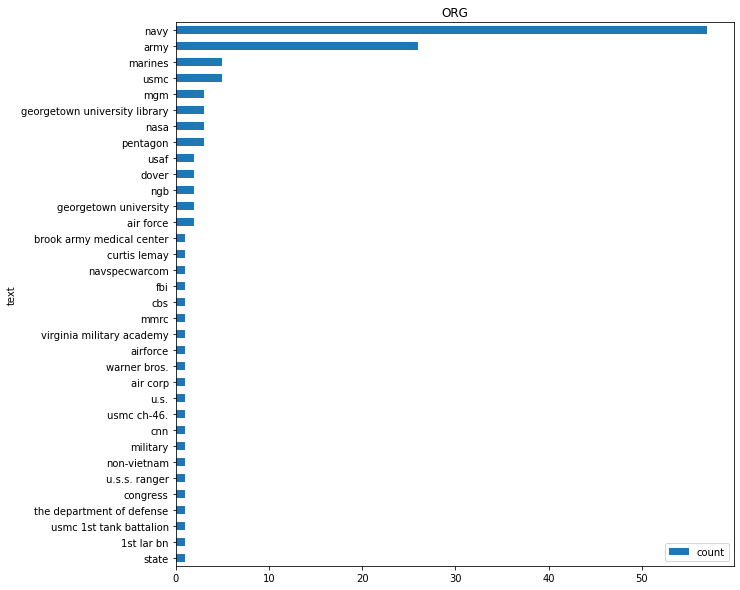

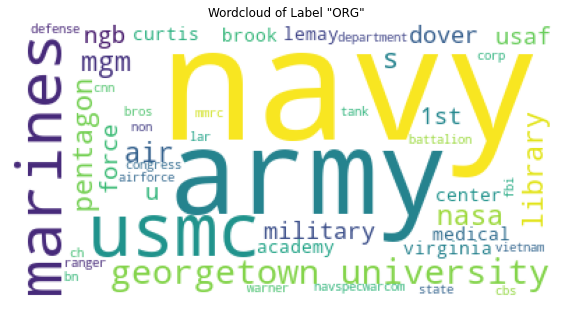

In [54]:
plot_entity_count(dod_remark_entities, "ORG", minimum_count=1)
plot_entity_cloud(dod_remark_entities, "ORG", minimum_count=1)

#### Interpretation of the analysis of ORG entities

TBD

### Analysis of PRODUCT entities

PRODUCT represents the Objects, vehicles, food, etc. (Not Services)

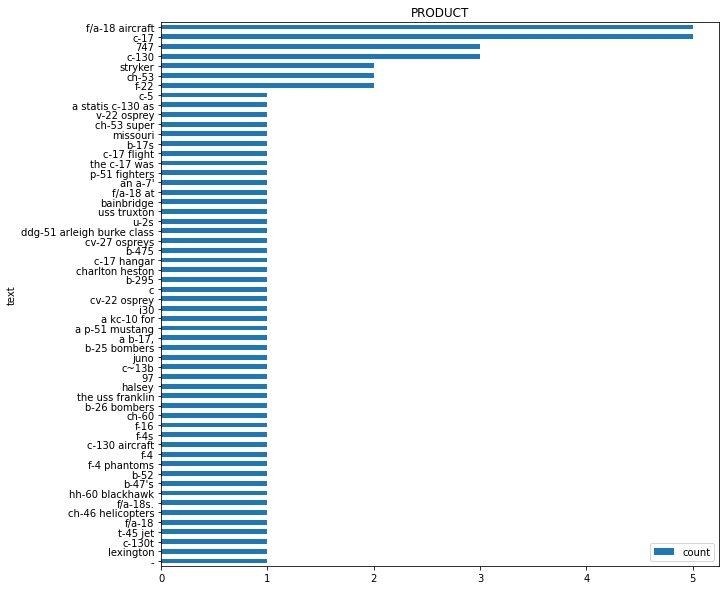

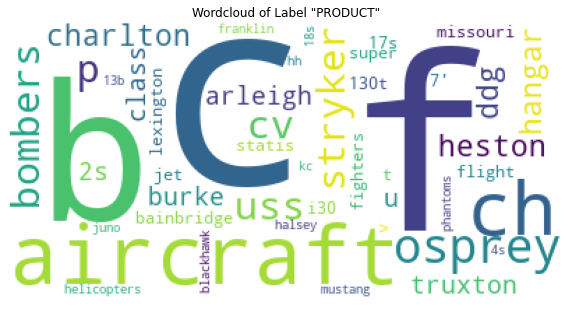

In [53]:
plot_entity_count(dod_remark_entities, "PRODUCT", minimum_count=1)
plot_entity_cloud(dod_remark_entities, "PRODUCT", minimum_count=1)